# Analysis of chemo diversity on pharmacological and biological activities

Datasets are obtained by querying scopus, this is done by a dedicated Python program [`downloader.py`](downloader.py).

First, we load the last version of the dataset [`results/activities_2021-11-10_12-34-35.csv`](results/activities_2021-11-10_12-34-35.csv).

In [1]:
from pathlib import Path
from itertools import islice
from pprint import pprint

import pandas as pd
pd.set_option("display.float_format", lambda x: "{:.3f}".format(x))

from loader import load_chemo_activities, sort_by_class

FILENAME = Path("results/activities_2021-11-10_12-34-35.csv")
dataset = load_chemo_activities(FILENAME)

# converts to pandas
df = pd.DataFrame(dataset.data).T
df.columns.rename('Activity', inplace=True)
df.index.rename('Compound', inplace=True)

INFO:scopus_api:load_chemo_activities('results/activities_2021-11-10_12-34-35.csv') loaded


The dataset contains :

- 33 pharmacological and biological activities, with their classes of activity (generalization)
- 53 chemical compounds, with their classes of activity (generalization)

A sample of categories is given below.

In [2]:
samples_activities = list(islice(dataset.activities.items(), 0, 10))
samples_compounds = list(islice(dataset.compounds.items(), 0, 10))

print("Compounds, a.k.a. rows:")
for item, cat in samples_compounds:
    print(f"{item} -> {cat}")
print("...")
print("Activities, a.k.a. columns:")
for item, cat in samples_activities:
    print(f"{item} -> {cat}")
print("...")

Compounds, a.k.a. rows:
acridine -> alkaloid
benzylamine -> alkaloid
colchicine -> alkaloid
cyclopeptide -> alkaloid
imidazole -> alkaloid
indole -> alkaloid
indolizidine -> alkaloid
isoquinoline -> alkaloid
isoxazole -> alkaloid
muscarine -> alkaloid
...
Activities, a.k.a. columns:
antioxidant -> abiotic
drought -> abiotic
metal -> abiotic
salt -> abiotic
uv -> abiotic
antifeedant -> allelopathy
arbuscula -> allelopathy
attractant -> allelopathy
germination -> allelopathy
herbicidal -> allelopathy
...


Now we give the full dataset (categories are not shown).

In [3]:
df

Activity,antioxidant,drought,metal,salt,uv,antifeedant,arbuscula,attractant,germination,herbicidal,...,antiviral,arthritis,burns,cardiovascular,cytotoxicity,obesity,rheumatism,sedative,wound,toxicity
Compound,,,,,,,,,,,,,,,,,,,,,
acridine,262,2,250,163,78,1,0,0,11,1,...,117,26,16,45,1273,3,0,8,76,396
benzylamine,70,0,163,79,23,0,0,0,4,6,...,23,12,1,87,121,34,0,6,18,101
colchicine,185,4,82,185,19,0,0,0,44,0,...,102,1594,31,592,1243,168,19,34,219,860
cyclopeptide,57,1,167,34,16,0,0,0,17,1,...,92,674,1,77,509,44,6,4,49,168
imidazole,1069,7,2454,1183,297,3,0,1,52,8,...,1187,382,120,1253,2776,290,1,480,452,1748
indole,1299,53,1456,705,278,4,0,13,173,6,...,842,307,19,783,3626,338,12,78,338,1347
indolizidine,1,0,2,8,0,0,0,0,0,0,...,14,1,0,0,27,0,0,0,1,4
isoquinoline,135,2,146,141,20,2,0,0,6,3,...,319,58,5,103,621,32,0,18,26,181
isoxazole,123,2,77,135,20,0,0,0,4,13,...,228,508,2,77,359,56,2,27,49,271


## Correspondance Analysis

Now, we use <https://en.wikipedia.org/wiki/Correspondence_analysis> - **CA**, a kind of PCA for two-ways contingency tables.

We use <https://statmath.wu.ac.at/courses/CAandRelMeth/caipA.pdf> as a reference specification.
See also <https://cedric.cnam.fr/fichiers/art_3066.pdf> (bu it defines CA from _Generalized_ SVD, not _standard_ SVD)

The demo amounts to redo from scratch what <https://github.com/MaxHalford/prince/blob/master/prince/ca.py> does, with more control.

In [4]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

# filters rows and columns according to their marginal sums
r_citations = 0
c_citations = 0
df_filtered = df.loc[(df.sum(axis=1) > r_citations), (df.sum(axis=0) > c_citations)]


In [5]:
X = df_filtered.to_numpy()
N = np.sum(X)
Z = X / N
print(f"Total number of citations {N = }")


Total number of citations N = 386562


In [6]:
C = np.sum(X, axis = 0) # Z @ np.ones(X.shape[0])
# print(f"{C = }")
R = np.sum(X, axis = 1) # X @ np.ones(X.shape[1])
# print(f"{R = }")


c = np.sum(Z, axis = 0)
print(f"Marginal sums of columns ({np.sum(c) = })\n{100*c = }")
r = np.sum(Z, axis = 1)
print(f"Marginal sums of columns ({np.sum(r) = }\n{100*r = }")

Marginal sums of columns (np.sum(c) = 1.0)
100*c = array([23.6011,  0.3521,  7.2392,  3.9463,  1.9673,  0.0616,  0.0028,
        0.0347,  0.8133,  0.0579,  0.0039,  0.0101,  0.3893,  0.2745,
        0.0166,  0.0352,  5.1937,  6.9668,  1.4538,  2.068 ,  4.8116,
        7.4128,  0.3311,  2.7307,  2.0775,  0.3485,  2.9814, 12.5869,
        1.435 ,  0.0199,  0.6995,  2.0576,  8.0192])
Marginal sums of columns (np.sum(r) = 0.9999999999999999
100*r = array([ 0.8475,  0.2483,  1.7459,  0.8074,  4.9845,  4.1802,  0.0235,
        0.6229,  0.8312,  0.0222,  0.5958,  0.0197,  1.9645,  1.4365,
        0.3166,  5.7872,  0.9841,  0.2176,  0.8591,  4.0402,  0.0486,
        0.3839,  0.3906,  4.2363,  0.0776,  0.7148,  1.3708,  0.2393,
       14.7208,  0.0005,  0.7587,  0.9357, 17.9518,  3.6134,  0.2708,
        1.6763,  4.2979,  0.618 ,  0.096 ,  0.0367,  2.0788,  0.4475,
        0.2789,  5.5179,  1.1388,  0.0466,  0.2538,  0.0241,  0.0008,
        1.9084,  0.0636,  3.3974,  1.8701])


The subtraction of the matrix $r.c^T$ from $Z$ is equivalent to a double centering of the matrix.
We further normalize to obtain the matrix $S$.

In [7]:
Dc = np.diag(c)
Dr = np.diag(r)

# print(f"{Z.shape = }")
# print(f"{r[:, np.newaxis].shape = }")
# print(f"{c[:, np.newaxis].shape = }")

Zc = (Z - (r[:, np.newaxis]@(c[:, np.newaxis].T)))
S = np.diag(r ** (-0.5)) @ Zc @ np.diag(c ** (-0.5))


print(f"{S.shape = }")

S.shape = (53, 33)


Now, we use Singular Value Decomposition to obtain matrix $U$, $D$ and $V^T$ of appropriate dimensions.

In [8]:
from scipy import linalg
U, D, Vt = linalg.svd(S)
Da = (np.eye(U.shape[0], Vt.shape[0]) * D)

print(f"{ U.shape,  D.shape, Da.shape, Vt.shape = }")

# SVD ensures that Vt  @ Vt.T == I == U.T @ U
assert np.allclose(Vt  @ Vt.T, np.identity(Vt.shape[0]))
assert np.allclose(U.T  @ U, np.identity(U.shape[0]))


 U.shape,  D.shape, Da.shape, Vt.shape = ((53, 53), (33,), (53, 33), (33, 33))


Now, we keep only the coordinates of both compounds and activities on the first 2 axis of the SVD (similarly to PCA).

In [9]:
r_std_coords = np.diag(r ** (-0.5)) @ U
r_coords = r_std_coords @ Da
pprint(r_coords[:10, :2])

c_std_coords = np.diag(c ** (-0.5)) @ Vt.T
c_coords = c_std_coords @ Da.T
pprint(c_coords[:10, :2])


array([[-0.3506,  0.3909],
       [-0.3489,  0.3723],
       [-0.7588,  0.409 ],
       [-0.8074, -0.139 ],
       [-0.4762,  0.2767],
       [-0.349 ,  0.2456],
       [-0.5799,  0.3904],
       [-0.4942,  0.4061],
       [-0.674 ,  0.1722],
       [-0.6331,  0.6162]])
array([[ 0.8109, -0.0141],
       [ 0.8196,  0.1063],
       [-0.1088,  0.1602],
       [-0.4354,  0.4934],
       [ 0.339 ,  0.0868],
       [-0.0565,  0.1157],
       [-0.0187, -0.0773],
       [-0.1332, -0.1121],
       [ 0.522 ,  0.0547],
       [-0.4673,  0.4332]])


We can compute _explained inertia_ which quantify the amounts of information captured by the first two axis. 

In [22]:
K = min(S.shape)
print(f"{K = }")
principal_inertias = np.diag(Da) ** 2
print(f"(eigenvalues) {principal_inertias = }")

total_inertia = np.trace(S @ S.T)
print(f"{total_inertia = }")

explained_inertias = 100 * principal_inertias / total_inertia
print(f"{explained_inertias = }")

K = 33
(eigenvalues) principal_inertias = array([0.247 , 0.1221, 0.0773, 0.0603, 0.0491, 0.0304, 0.0253, 0.0205,
       0.0131, 0.0121, 0.007 , 0.0055, 0.0043, 0.004 , 0.003 , 0.0021,
       0.0017, 0.0014, 0.0012, 0.0009, 0.0007, 0.0005, 0.0005, 0.0004,
       0.0003, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.    , 0.    ,
       0.    ])
total_inertia = 0.6914630110806479
explained_inertias = array([35.7205, 17.6648, 11.1856,  8.7136,  7.1036,  4.4019,  3.6626,
        2.9663,  1.8878,  1.7491,  1.0185,  0.7901,  0.6234,  0.5751,
        0.4396,  0.2988,  0.2466,  0.2065,  0.1718,  0.1283,  0.0994,
        0.0743,  0.0658,  0.0547,  0.0397,  0.0325,  0.0263,  0.0177,
        0.016 ,  0.0097,  0.007 ,  0.0022,  0.    ])


As shown above, the first two dimensions CA explains about 53.4% of inertia (35.7205 + 17.6648).

### Graphical representation of compounds on the first two axis

Now, we draw compounds and activities as scatterplots on the first 2 dimensions.

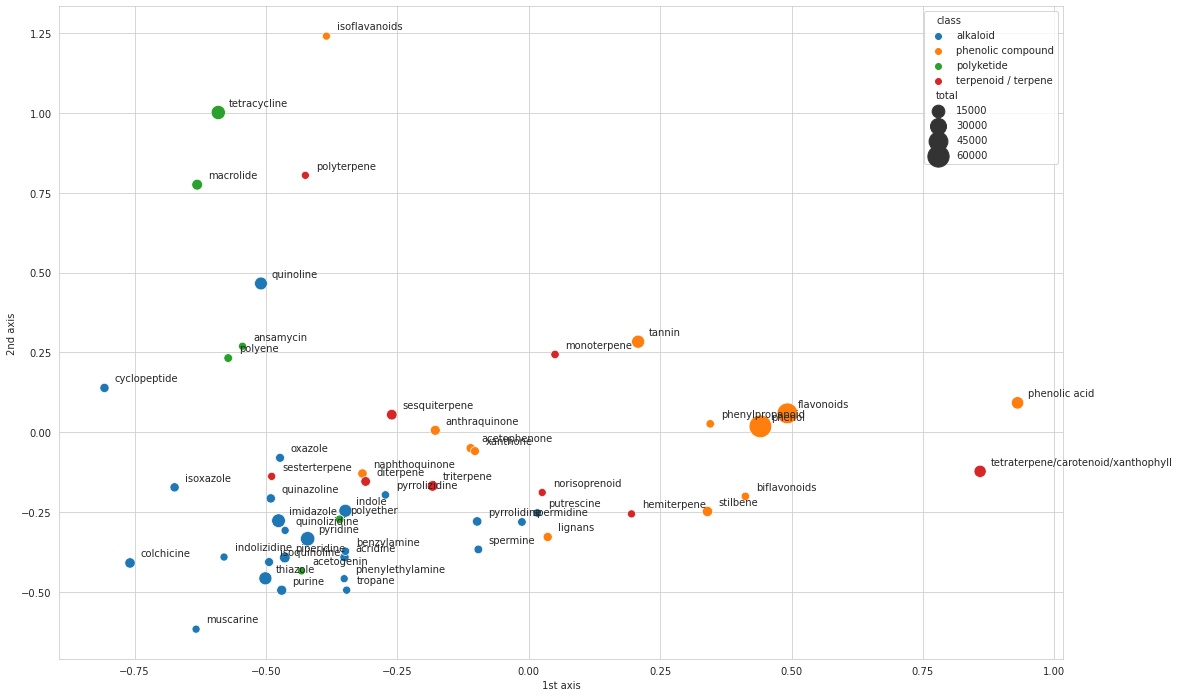

In [11]:
df_r = pd.DataFrame(index=df_filtered.index)
df_r["1st axis"] = r_coords[:, 0]
df_r["2nd axis"] = -r_coords[:, 1]
# df_r.index.rename('Compound', inplace=True)
df_r["class"] = [dataset.compounds[x] for x in df_r.index]
df_r["total"] = R
df_r["type"] = 'Compound'

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,12))

sns.scatterplot(data = df_r, x="1st axis", y = "2nd axis",  hue="class", size="total", sizes=(64, 512))
for index, row in df_r.iterrows():
    ax.annotate(index, (row["1st axis"] + .02, row["2nd axis"] + .02))

# sns.scatterplot(x=r_coords[:, 0, y=-r_coords[:, 1])
# sns.scatterplot(x=c_coords[:, 0], y=-c_coords[:, 1])]

### Graphical representation of activities on the first two axis

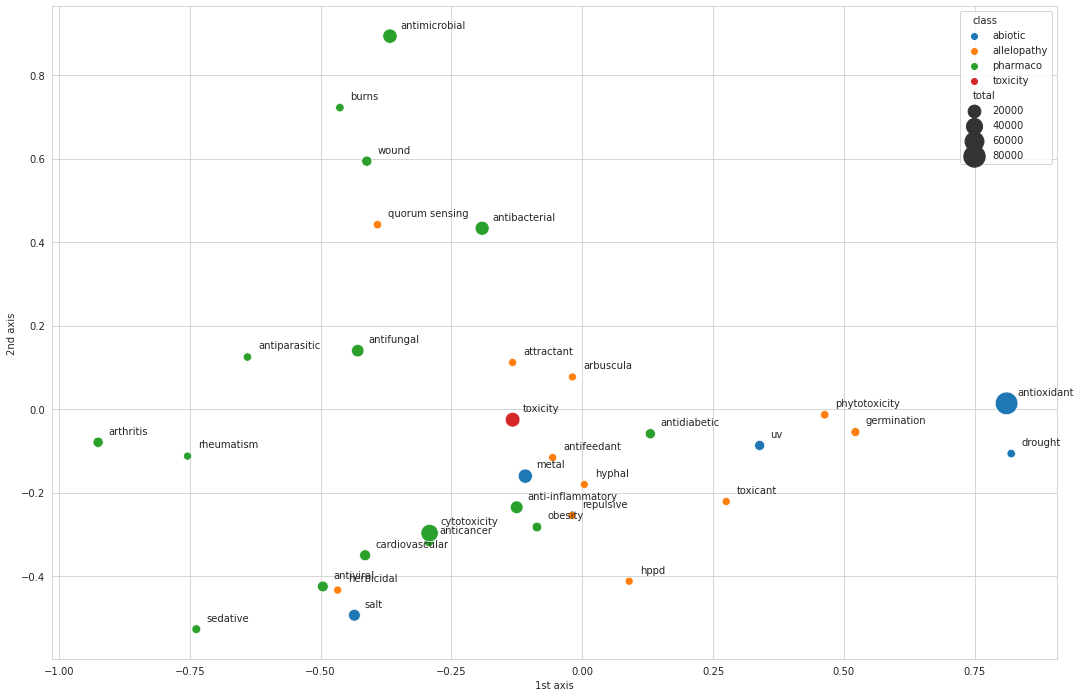

In [12]:
df_c = pd.DataFrame(index = df_filtered.columns)
df_c["1st axis"] = c_coords[:, 0]
df_c["2nd axis"] = -c_coords[:, 1]
df_c["class"] = [dataset.activities[x] for x in df_c.index]
df_c["total"] = C
df_c["type"] = 'Activity'

fig, ax = plt.subplots(figsize=(18,12))

sns.scatterplot(data = df_c, x="1st axis", y = "2nd axis",  hue="class", size="total", sizes=(64, 512))
for index, row in df_c.iterrows():
    ax.annotate(index, (row["1st axis"] + .02, row["2nd axis"] + .02))

### Graphical representation of both compounds and activities on the first two axis

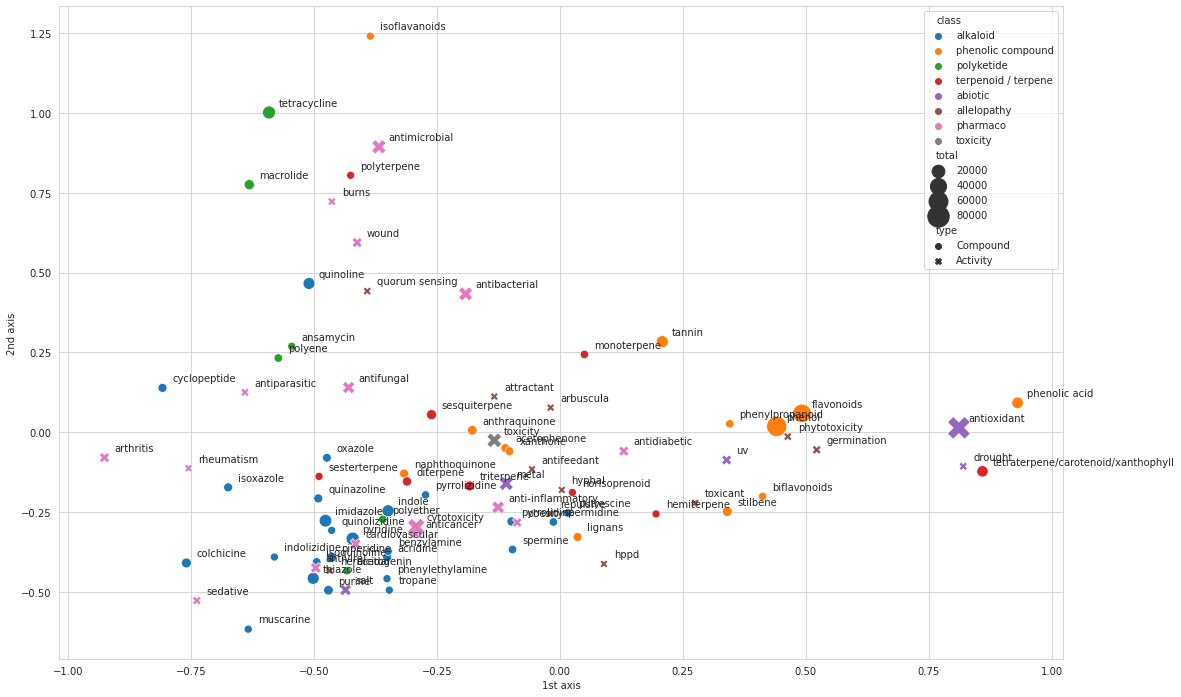

In [13]:
df_ca = pd.concat([df_r, df_c], axis= 0)
fig, ax = plt.subplots(figsize=(18,12))

sns.scatterplot(data = df_ca, x="1st axis", y = "2nd axis",  hue="class", size="total", sizes=(64, 512), style="type")
for index, row in df_ca.iterrows():
    ax.annotate(index, (row["1st axis"] + .02, row["2nd axis"] + .02))

### With the Prince library

See <https://github.com/MaxHalford/prince>. We obtain the same results.

In [39]:
import prince

ca = prince.CA(n_components=2, n_iter=5, copy=True, check_input=True, engine="auto", random_state=42, benzecri=False)
ca = ca.fit(df)

ca.row_coordinates(df)[:10]
ca.column_coordinates(df)[:10]

pprint(ca.explained_inertia_)
pprint(ca.col_masses_[:10])
pprint(ca.eigenvalues_)
pprint(ca.total_inertia_)

# ax = ca.plot_coordinates(
#      X=df,
#      ax=None,
#      figsize=(12, 12),
#      x_component=0,
#      y_component=1,
#      show_row_labels=True,
#      show_col_labels=True
#  )

[0.3572050603480797, 0.17664755027743384]
antioxidant   0.236
drought       0.004
metal         0.072
salt          0.039
uv            0.020
antifeedant   0.001
arbuscula     0.000
attractant    0.000
germination   0.008
herbicidal    0.001
dtype: float64
[0.2469940866015276, 0.12214524701485448]
0.6914630110806476


## Graph analysis

**Ongoing** need to find an appropriate conversion into a symetric graph.

In [125]:
import networkx as nx

matrix = X @ X.T
dsqrt = np.diag(np.power(matrix.diagonal(), -0.5))

data = dsqrt @ matrix @ dsqrt - np.eye(matrix.shape[0])
df_g = pd.DataFrame(index=df.index, columns=df.index, data=data)
# df_g[df_g > GRAPH_THRESHOLD]

In [129]:
GRAPH_THRESHOLD = 0.9
G = nx.from_pandas_adjacency(df_g[df_g > GRAPH_THRESHOLD].fillna(0))
print(nx.info(G))
# nx.nodes(G)
# G["acridine"]

Name: 
Type: Graph
Number of nodes: 53
Number of edges: 106
Average degree:   4.0000


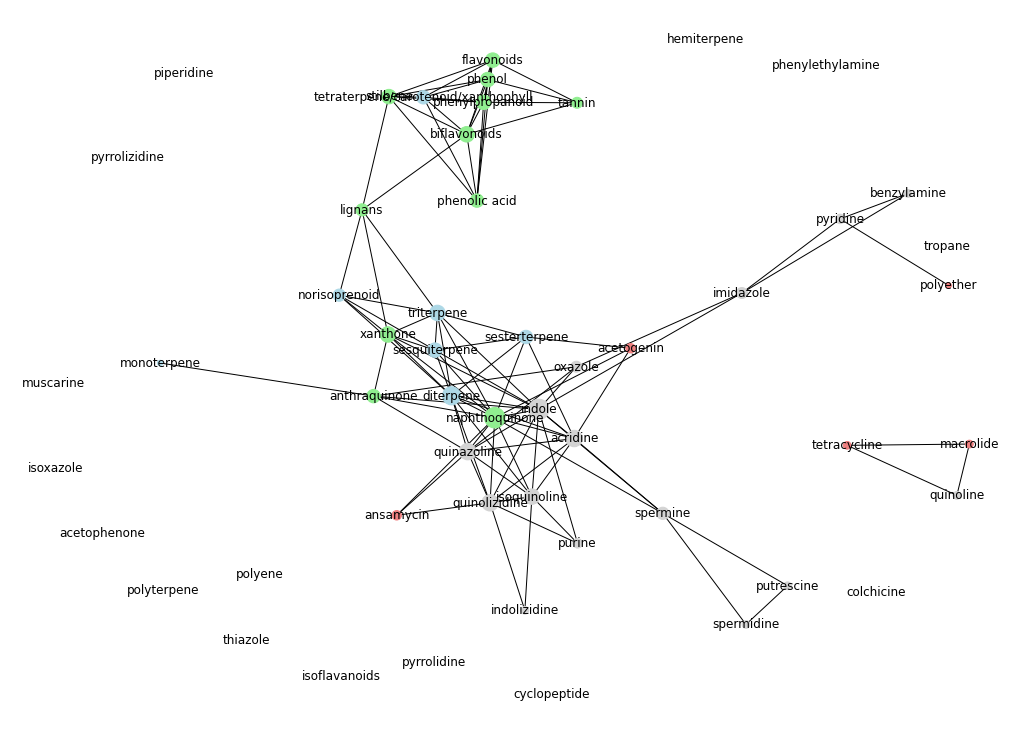

In [153]:
from pylab import rcParams

rcParams["figure.figsize"] = 14, 10
pos = nx.spring_layout(G, k=0.5)  # , scale=0.1, k=3/np.sqrt(G.order())
d = dict(G.degree)


classes = list(set(dataset.compounds.values()))
cmap = {
    "alkaloid": "lightgrey",
    "terpenoid / terpene": "lightblue",
    "phenolic compound": "lightgreen",
    "polyketide": "lightcoral",
}
colors = [cmap[dataset.compounds[node]] for node in G.nodes()]

nx.draw(G, pos, with_labels=True, nodelist=d, node_size=[d[k] * 30 for k in d], node_color=colors)
